<a href="https://colab.research.google.com/github/ra618/TelcoSmartCloud/blob/main/projetml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
file_path = '/content/drive/MyDrive/19May24 093911 pfe gremda laffrane.1.nmfExport.csv'
df = pd.read_csv(file_path, sep=';', encoding='utf-8', engine='python')

In [ ]:
print("Dimensions : ", df.shape)
print("\nDescription statistique :\n", df.describe())
print("\nAperçu des premières lignes :\n", df.head())

Dimensions :  (10424, 6)

Description statistique :
        Physical cell identity (pcell)  RSRP (pcell)  RSRQ (pcell)  \
count                     3426.000000   3426.000000   3426.000000   
mean                       224.676299    -83.641565     -9.283713   
std                         95.729875     14.801419      3.616920   
min                          5.000000   -118.000000    -27.000000   
25%                        155.000000    -93.000000    -11.000000   
50%                        227.000000    -82.000000     -8.000000   
75%                        297.000000    -72.000000     -7.000000   
max                        386.000000    -54.000000     -4.000000   

       RLC downlink throughput  
count              6993.000000  
mean                 10.925139  
std                   9.557156  
min                   0.000000  
25%                   0.100000  
50%                  11.100000  
75%                  18.700000  
max                  45.300000  

Aperçu des premières lignes

In [ ]:
df['Band_1800'] = df['Band (pcell)'].apply(lambda x: 1 if x == 'LTE FDD 1800 band 3' else 0)

In [ ]:
encoded_file_path = '/content/encoded_band_1800.csv'
df.to_csv(encoded_file_path, index=False)

In [ ]:
print(f"Fichier encodé sauvegardé à : {encoded_file_path}")


Fichier encodé sauvegardé à : /content/encoded_band_1800.csv


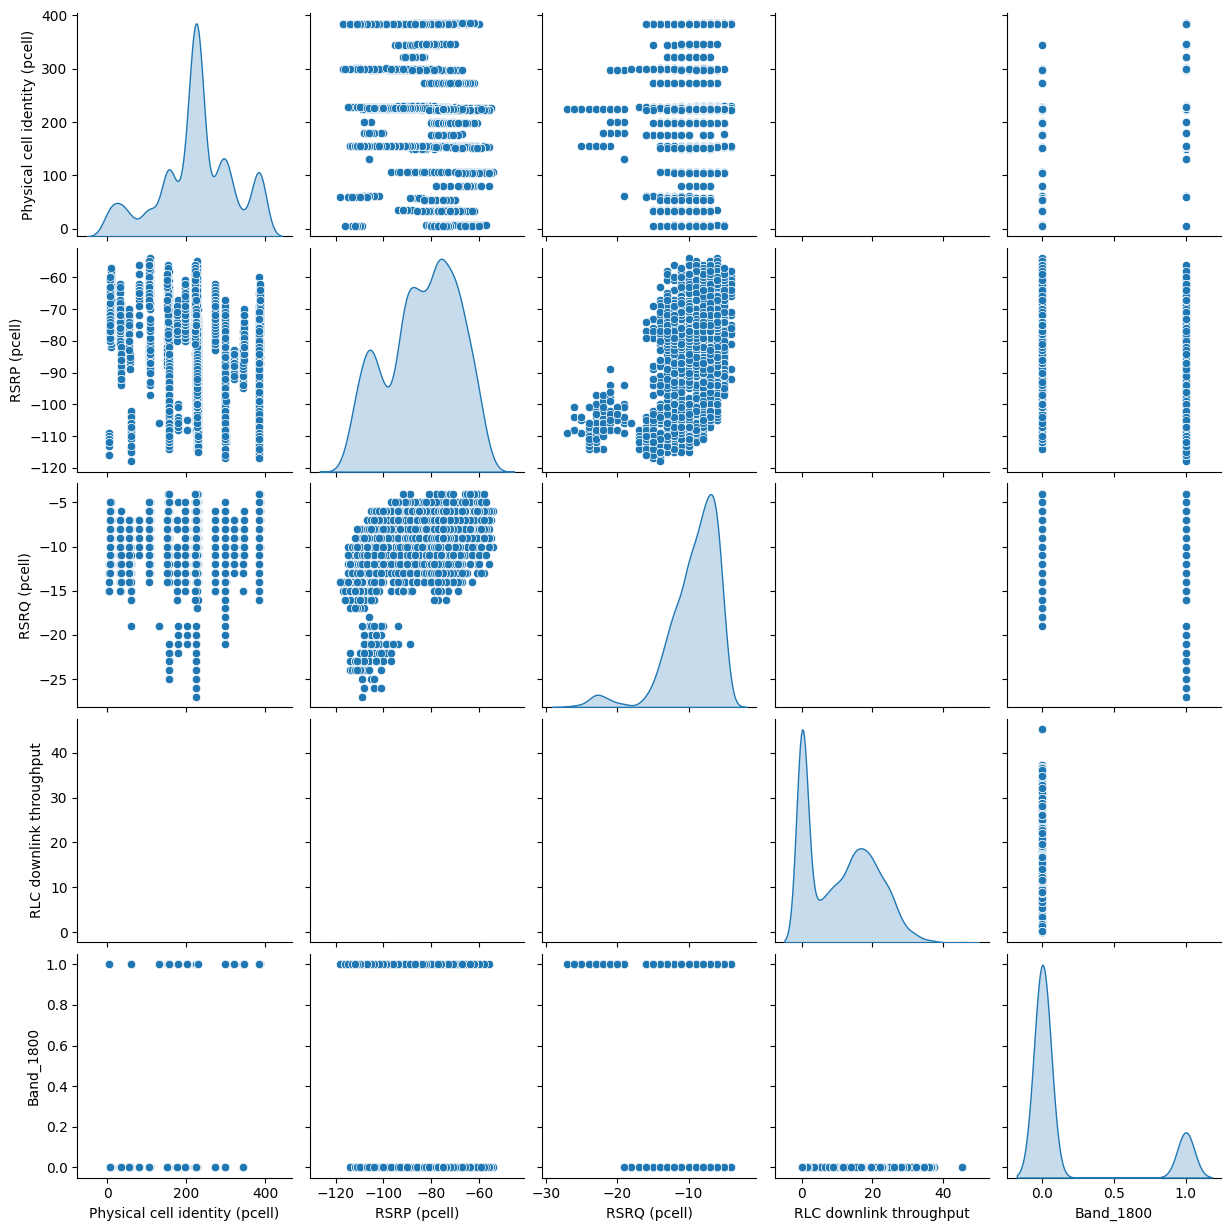

In [ ]:
# Scatterplot
df1 = pd.read_csv('/content/encoded_band_1800.csv')
sns.pairplot(df1, diag_kind='kde')
plt.show()

In [ ]:
# Replace missing values with 0
df = df.fillna(0)
encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    # Check if the column contains mixed types
    if df[column].apply(type).nunique() > 1:
        # Convert all values to strings before encoding
        df[column] = df[column].astype(str)
    df[column] = encoder.fit_transform(df[column])

                                    Time  Physical cell identity (pcell)  \
Time                            1.000000                       -0.082171   
Physical cell identity (pcell) -0.082171                        1.000000   
Band (pcell)                    0.182260                        0.737244   
RSRP (pcell)                    0.053166                       -0.892063   
RSRQ (pcell)                    0.019215                       -0.777209   
RLC downlink throughput         0.005920                       -0.486066   
Band_1800                      -0.359460                        0.746099   

                                Band (pcell)  RSRP (pcell)  RSRQ (pcell)  \
Time                                0.182260      0.053166      0.019215   
Physical cell identity (pcell)      0.737244     -0.892063     -0.777209   
Band (pcell)                        1.000000     -0.864215     -0.840478   
RSRP (pcell)                       -0.864215      1.000000      0.925081   
RSRQ (pcell

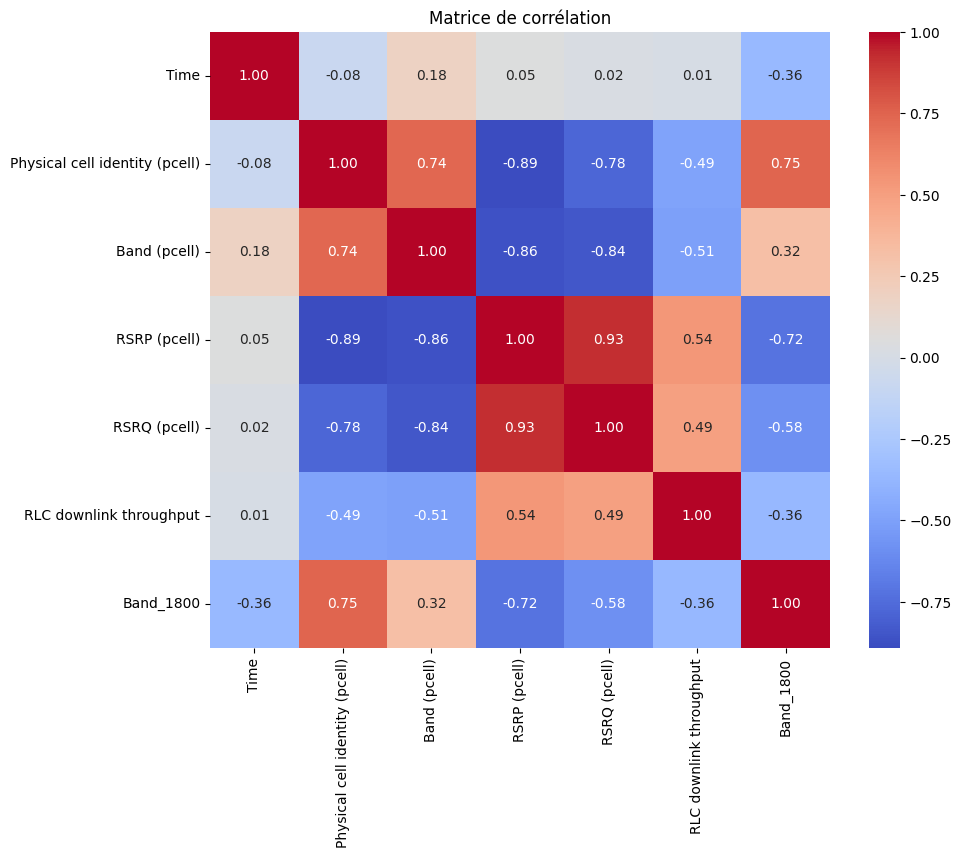

In [ ]:
# Assurez-vous que 'df' est votre DataFrame
correlation_matrix = df.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))  # Ajustez la taille de la figure si nécessaire
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

In [ ]:
df1 = pd.read_csv('/content/encoded_band_1800.csv')
print(df1.columns)
X = df1[['RSRP (pcell)', 'RSRQ (pcell)', 'RLC downlink throughput']]
y = df1['Band_1800']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les formes des ensembles de données résultants
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Index(['Time', 'Physical cell identity (pcell)', 'Band (pcell)',
       'RSRP (pcell)', 'RSRQ (pcell)', 'RLC downlink throughput', 'Band_1800'],
      dtype='object')
X_train shape: (8339, 3)
X_test shape: (2085, 3)
y_train shape: (8339,)
y_test shape: (2085,)


In [ ]:
# ipython-input-22-8be735093d14
df1 = pd.read_csv('/content/encoded_band_1800.csv')
print(df1.columns)
# ----> Replace NaN values with 0 in df1 <----
df1 = df1.fillna(0)
X = df1[['RSRP (pcell)', 'RSRQ (pcell)', 'RLC downlink throughput']]
y = df1['Band_1800']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les formes des ensembles de données résultants
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Index(['Time', 'Physical cell identity (pcell)', 'Band (pcell)',
       'RSRP (pcell)', 'RSRQ (pcell)', 'RLC downlink throughput', 'Band_1800'],
      dtype='object')
X_train shape: (8339, 3)
X_test shape: (2085, 3)
y_train shape: (8339,)
y_test shape: (2085,)


In [ ]:
# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1714
           1       0.76      0.74      0.75       371

    accuracy                           0.91      2085
   macro avg       0.85      0.84      0.85      2085
weighted avg       0.91      0.91      0.91      2085

[[1626   88]
 [  96  275]]
